# **K-Nearest Neighbors**
_____

This notebook implements the K-Nearest Neighbors (KNN) algorithm to classify weather conditions in Texas, specifically focusing on identifying 'extremely hot' days versus 'normal' days.


![Image of knn](https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png)

## **Required Libraries**
We'll use the following libraries:
- `numpy` and `pandas` for data manipulation
- `matplotlib` and `seaborn` for visualization
- `sklearn` for machine learning implementations
- `KNeighborsClassifier` for K neighbors classification
- `Classification Report` and `Confusion Matrix` for model performance evaluation graph

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

______
## **Data Loading and Preprocessing**
We'll work with weather data from Texas, focusing on the following features:
- Maximum temperature
- Minimum temperature
- Humidity
- Wind speed
- Precipitation
- Pressure

Our target variable will be a binary classification indicating whether a day is considered extreme (high temperature or heavy precipitation) or normal.

In [2]:
# Load the weather data

df = pd.read_csv("../../weather_data.csv")

print(df.head())

# Define features for classification
features = [
    'max_temp',
    'min_temp',
    'humidity',
    'wind_speed',
    'precipitation',
    'pressure'
]

# Create target variable (1 for extremely hot days, 0 for normal days)
df['is_extreme'] = (df['max_temp'] >= 95).astype(int)

# Split features and target
X = df[features].values
y = df['is_extreme'].values

         date  max_temp  min_temp  humidity  wind_speed  precipitation  \
0  2019-01-01      87.5      59.5      67.2         8.3           0.07   
1  2019-01-02      84.7      72.4      75.4        10.8           0.14   
2  2019-01-03      88.9      65.2      79.2        12.2           0.07   
3  2019-01-04      93.6      66.1      75.2        13.0           0.05   
4  2019-01-05      85.2      69.9      70.0        10.2           0.05   

   pressure  solar_radiation  
0    1013.2            273.3  
1    1013.6            265.2  
2    1011.0            312.8  
3    1014.4            232.4  
4    1013.2            280.9  


______
## **Exploratory Data Analysis**
Let's visualize our data to understand:
1. Feature correlations through a heatmap
2. Distribution of extreme vs normal days


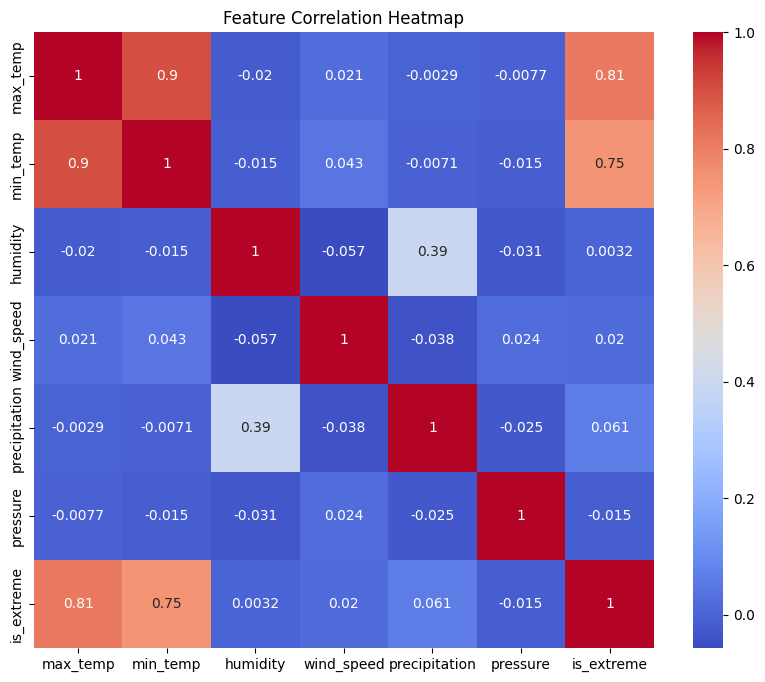

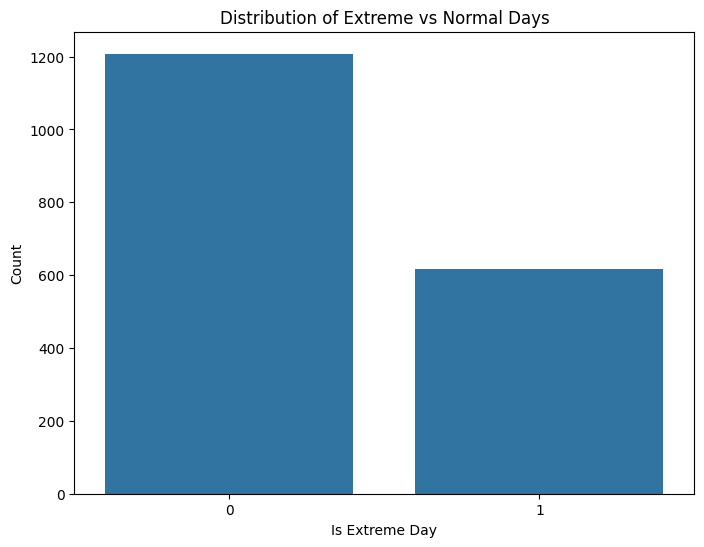

In [3]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['is_extreme']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_extreme')
plt.title('Distribution of Extreme vs Normal Days')
plt.xlabel('Is Extreme Day')
plt.ylabel('Count')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       246
           1       0.93      0.94      0.94       120

    accuracy                           0.96       366
   macro avg       0.95      0.95      0.95       366
weighted avg       0.96      0.96      0.96       366



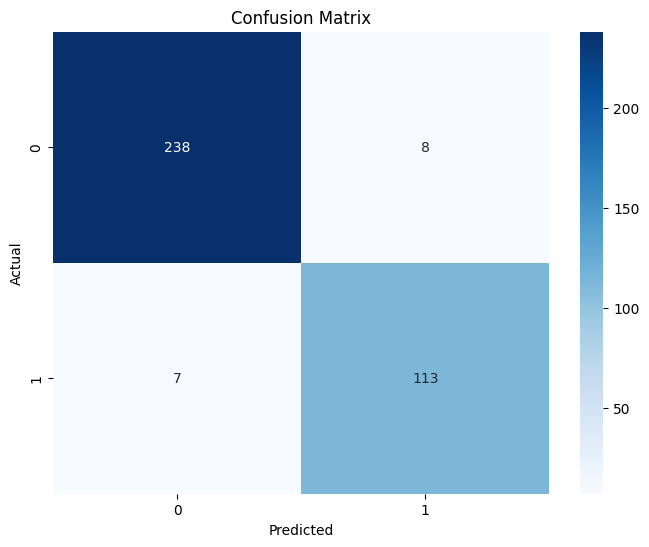

In [4]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

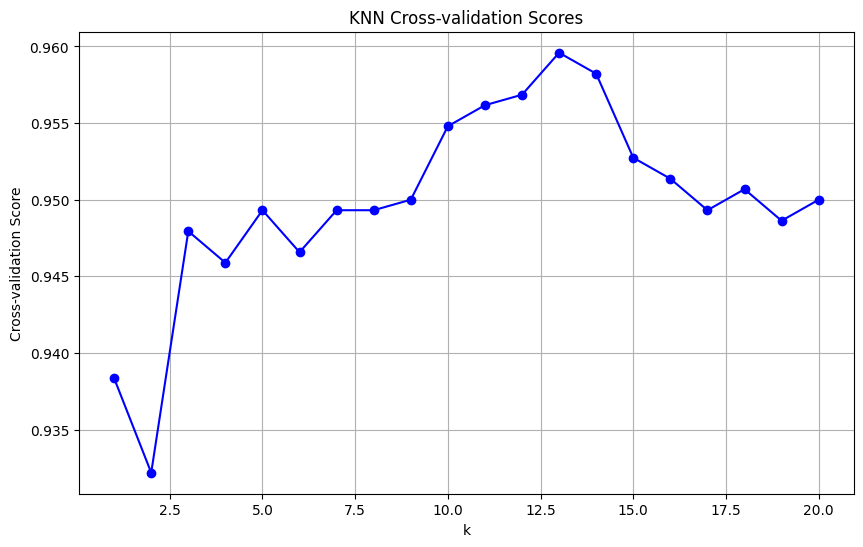

In [5]:
# Perform cross-validation with different k values
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Cross-validation Score')
plt.title('KNN Cross-validation Scores')
plt.grid(True)
plt.show()

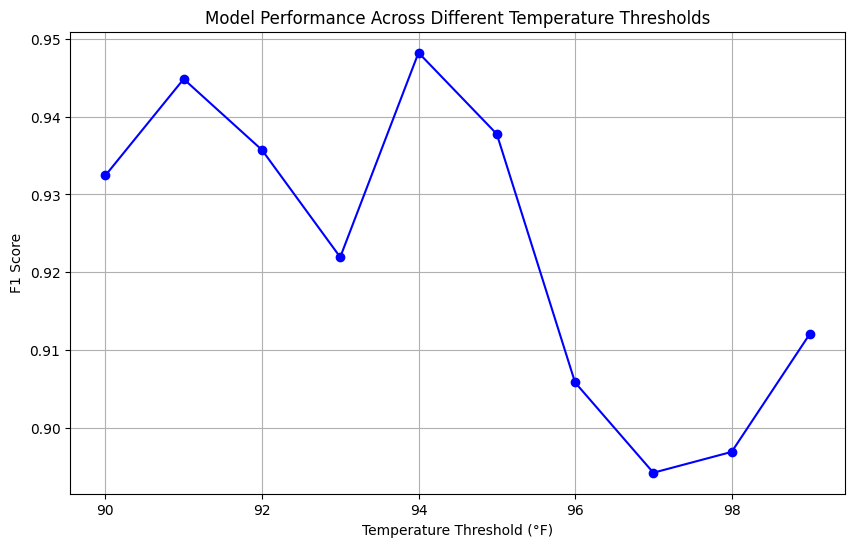

In [6]:
from sklearn.metrics import f1_score


# Analyze model performance across different temperature thresholds
thresholds = range(90, 100, 1)
f1_scores = []

for threshold in thresholds:
    # Create new target variable with current threshold
    y_new = (df['max_temp'] >= threshold).astype(int)
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot F1 scores for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, 'bo-')
plt.xlabel('Temperature Threshold (°F)')
plt.ylabel('F1 Score')
plt.title('Model Performance Across Different Temperature Thresholds')
plt.grid(True)
plt.show()

____
## **Conclusion and Final Notes**

### Confusion Matrix Analysis
The KNN model performs strongly in identifying class 0, with 238 correct predictions and only 8 misclassifications. Class 1 is also predicted fairly well, with 113 correct predictions and 7 errors.

### Cross-Validation Insight
The cross-validation score improves as the number of neighbors (k) increases, peaking at **k ≈ 13**. This suggests that the optimal number of neighbors for best model performance is around 13.

### **Final Notes**
- KNN is effective, especially for class 0 detection.
- Optimal performance is achieved near **k = 13**.
- Minor misclassification exists for class 1, which could be improved with tuning or additional features.
